In [132]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from pandas.tools.plotting import autocorrelation_plot

In [71]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()
#pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',parse_dates=True, index_col='Year',date_parser=dateparse, low_memory=False) 

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [73]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [74]:
argentina_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin(['AG.LND.AGRI.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind2 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.DYN.CBRT.IN'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind3 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.DPND'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind4 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.EXP.GNFS.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind5 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind6 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.KD.ZG'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind7 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.GROW'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind8 = indicator_data[(indicator_data['IndicatorCode'].isin(['FI.RES.TOTL.CD'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind9 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.TRD.GNFS.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]

In [75]:
argentina_df_ind1.head(20)

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)
2011-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.182607,Agricultural land (% of land area)
2010-01-01,Argentina,AR,AG.LND.AGRI.ZS,53.890284,Agricultural land (% of land area)
2009-01-01,Argentina,AR,AG.LND.AGRI.ZS,52.542305,Agricultural land (% of land area)
2008-01-01,Argentina,AR,AG.LND.AGRI.ZS,52.713680,Agricultural land (% of land area)


In [76]:
argentina_df_ind1.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [77]:
ts = argentina_df_ind1['Value'] 
ts1 = argentina_df_ind1[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,54.335712
2015-01-01,54.335712
2014-01-01,54.335712
2013-01-01,54.518049
2012-01-01,54.538146


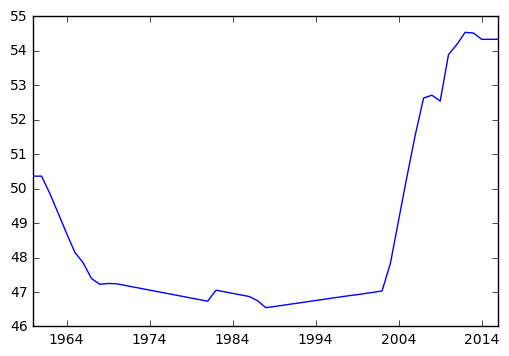

In [36]:
plt.plot(ts)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


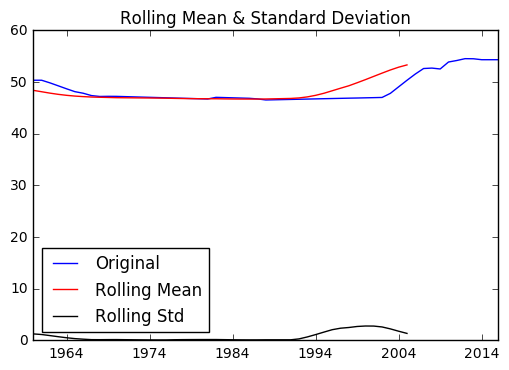

Results of Dickey-Fuller Test:
Test Statistic                 -5.316516
p-value                         0.000005
#Lags Used                      8.000000
Number of Observations Used    48.000000
Critical Value (10%)           -2.600039
Critical Value (5%)            -2.923954
Critical Value (1%)            -3.574589
dtype: float64


In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts)

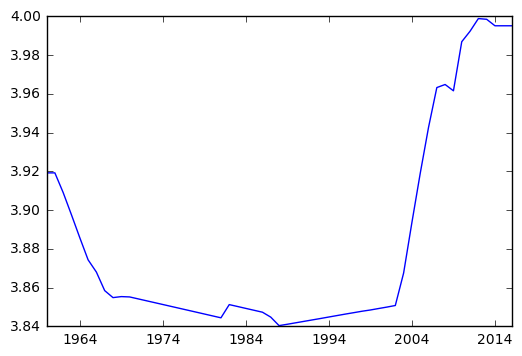

In [15]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=56,center=False).mean()
  if __name__ == '__main__':


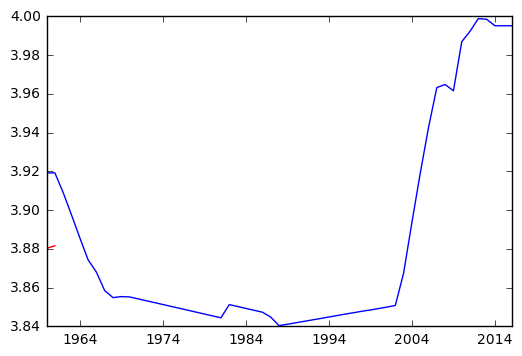

In [21]:
moving_avg = pd.rolling_mean(ts_log,56)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [22]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(56)

Year
2016-01-01         NaN
2015-01-01         NaN
2014-01-01         NaN
2013-01-01         NaN
2012-01-01         NaN
2011-01-01         NaN
2010-01-01         NaN
2009-01-01         NaN
2008-01-01         NaN
2007-01-01         NaN
2006-01-01         NaN
2005-01-01         NaN
2004-01-01         NaN
2003-01-01         NaN
2002-01-01         NaN
2001-01-01         NaN
2000-01-01         NaN
1999-01-01         NaN
1998-01-01         NaN
1997-01-01         NaN
1996-01-01         NaN
1995-01-01         NaN
1994-01-01         NaN
1993-01-01         NaN
1992-01-01         NaN
1991-01-01         NaN
1990-01-01         NaN
1989-01-01         NaN
1988-01-01         NaN
1987-01-01         NaN
1986-01-01         NaN
1985-01-01         NaN
1984-01-01         NaN
1983-01-01         NaN
1982-01-01         NaN
1981-01-01         NaN
1980-01-01         NaN
1979-01-01         NaN
1978-01-01         NaN
1977-01-01         NaN
1976-01-01         NaN
1975-01-01         NaN
1974-01-01         NaN
1973-0

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


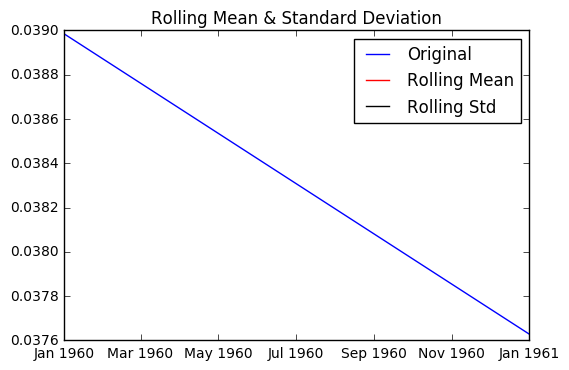

Results of Dickey-Fuller Test:


ValueError: maxlag should be < nobs

In [23]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [24]:
from statsmodels.tsa.stattools import acf, pacf

In [25]:
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')

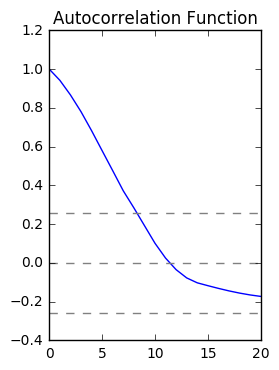

In [27]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

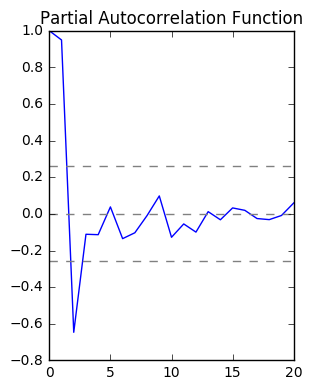

In [28]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [29]:
model = ARIMA(ts, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts)**2))

NameError: name 'ARIMA' is not defined

In [42]:
ts_slice=ts['2002-01-01':'1968-01-01']
ts_slice.head()

Year
2002-01-01    47.031268
2001-01-01    46.993266
2000-01-01    46.958187
1999-01-01    46.922377
1998-01-01    46.892414
Name: Value, dtype: float64

In [41]:
ts.head()

Year
2016-01-01    54.335712
2015-01-01    54.335712
2014-01-01    54.335712
2013-01-01    54.518049
2012-01-01    54.538146
Name: Value, dtype: float64

[ 47.18821436  47.15167776  47.11786438  47.08831684  47.0633355 ]


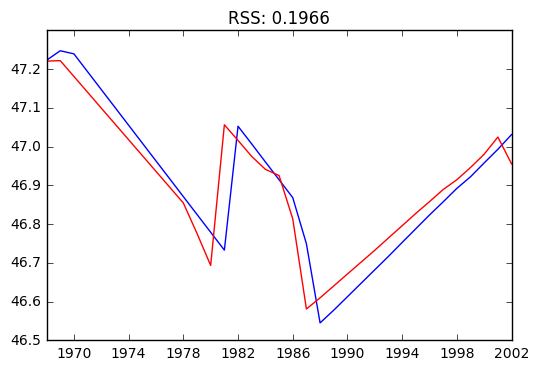

In [46]:
model = ARIMA(ts_slice, order=(3,0, 0))  
results_AR = model.fit(disp=-1)  
print(results_AR.forecast(steps=5)[0])

plt.plot(ts_slice)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_slice)**2))

In [51]:
model = ARIMA(ts_slice, order=(0, 0, 7))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_slice)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_slice)**2))

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

# New approch 

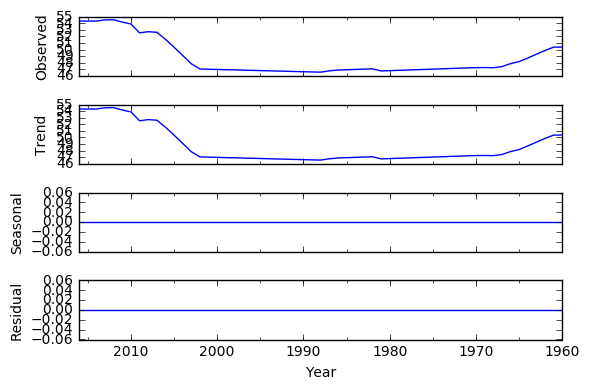

In [58]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

In [59]:
def meanVarianceCheck(df):
    X = df.values
    split = len(X) / 2
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    return ('mean1=%f, mean2=%f' % (mean1, mean2), 'variance1=%f, variance2=%f' % (var1, var2))

In [ ]:
meanVarianceCheck(ts1)

In [79]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


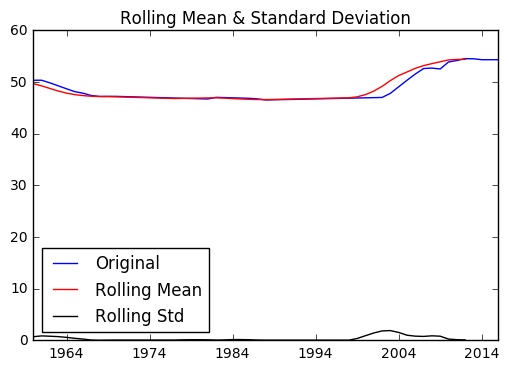

Results of Dickey-Fuller Test:
Test Statistic                 -5.316516
p-value                         0.000005
#Lags Used                      8.000000
Number of Observations Used    48.000000
Critical Value (10%)           -2.600039
Critical Value (5%)            -2.923954
Critical Value (1%)            -3.574589
dtype: float64


In [81]:
test_stationarity(ts1.Value)

In [82]:
#log transform
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

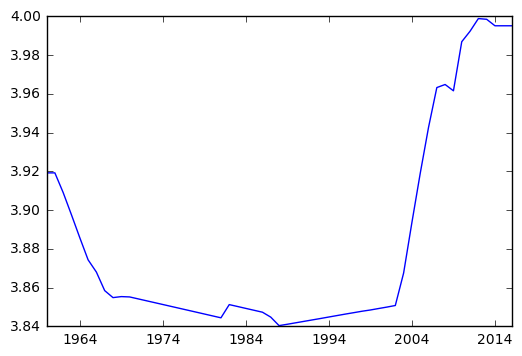

In [83]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


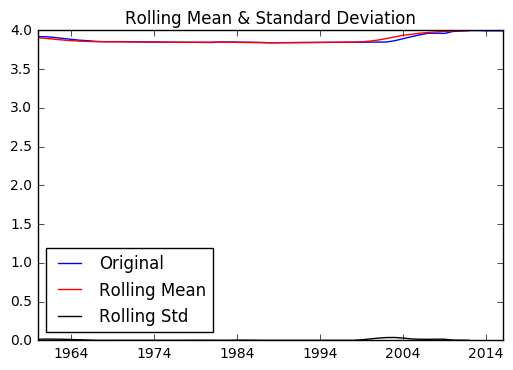

Results of Dickey-Fuller Test:
Test Statistic                 -5.085152
p-value                         0.000015
#Lags Used                      8.000000
Number of Observations Used    48.000000
Critical Value (10%)           -2.600039
Critical Value (5%)            -2.923954
Critical Value (1%)            -3.574589
dtype: float64


In [84]:
test_stationarity(ts1_log.Value)

In [85]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


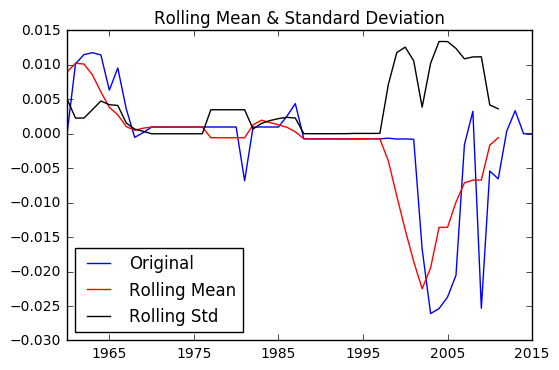

Results of Dickey-Fuller Test:
Test Statistic                 -1.561113
p-value                         0.503093
#Lags Used                      5.000000
Number of Observations Used    50.000000
Critical Value (10%)           -2.598662
Critical Value (5%)            -2.921360
Critical Value (1%)            -3.568486
dtype: float64


In [86]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

In [87]:
def firstDifference(df):
    ts_first_diff = df - df.shift()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()


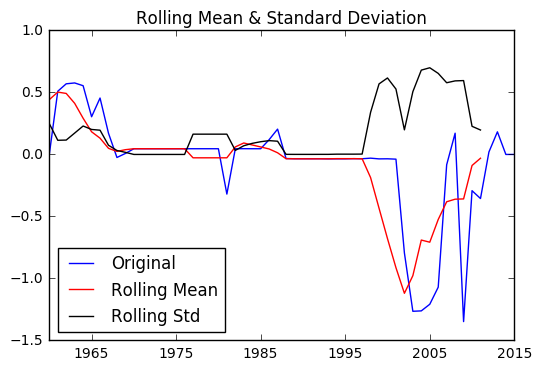

Results of Dickey-Fuller Test:
Test Statistic                 -1.545362
p-value                         0.510964
#Lags Used                      5.000000
Number of Observations Used    50.000000
Critical Value (10%)           -2.598662
Critical Value (5%)            -2.921360
Critical Value (1%)            -3.568486
dtype: float64


In [88]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

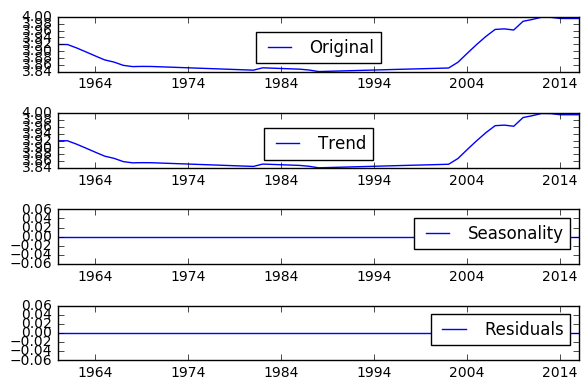

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [90]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [91]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [129]:
def AR_Model(ts):
    model = ARIMA(ts, order=(3, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(3, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 3
Coefficients: const          3.904876
ar.L1.Value    1.611109
ar.L2.Value   -0.520464
ar.L3.Value   -0.110851
dtype: float64
2006-01-01    52.534773
Freq: -1AS-JAN, dtype: float64
-408.28432975025567


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


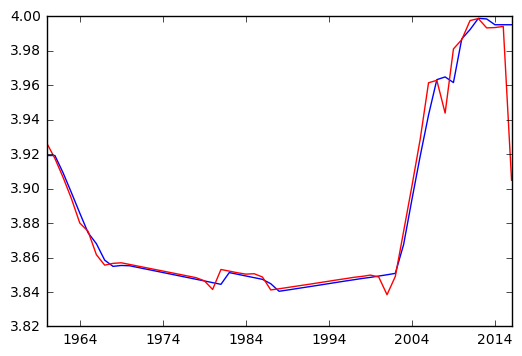

In [130]:
model_AR = AR_Model(ts1_log)

In [135]:
def MA_Model(ts):
    model = ARIMA(ts, order=(1, 0, 7))  
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(1, 0, 7))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Lag: 1
Coefficients: const          3.918704
ar.L1.Value    0.951648
ma.L1.Value    0.602412
ma.L2.Value    0.556715
ma.L3.Value    0.635493
ma.L4.Value    0.260697
ma.L5.Value    0.112185
ma.L6.Value    0.159182
ma.L7.Value    0.486454
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(1, 7)   Log Likelihood                 211.134
Method:                       css-mle   S.D. of innovations              0.005
Date:                Sun, 13 Aug 2017   AIC                           -402.268
Time:                        16:40:28   BIC                           -381.838
Sample:                    01-01-2016   HQIC                          -394.328
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------

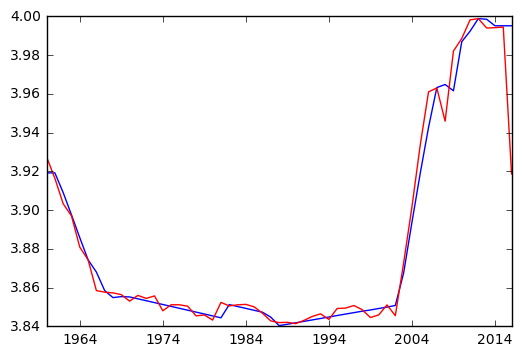

In [136]:
model_MA = MA_Model(ts1_log)

In [111]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(2, 0, 4))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2,0, 4))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 2
Coefficients: const          3.894464
ar.L1.Value    1.971011
ar.L2.Value   -0.979535
ma.L1.Value   -0.449505
ma.L2.Value   -0.234322
ma.L3.Value   -0.029942
ma.L4.Value   -0.286232
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(2, 4)   Log Likelihood                 211.580
Method:                       css-mle   S.D. of innovations              0.006
Date:                Sun, 13 Aug 2017   AIC                           -407.161
Time:                        03:49:29   BIC                           -390.816
Sample:                    01-01-2016   HQIC                          -400.809
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
cons

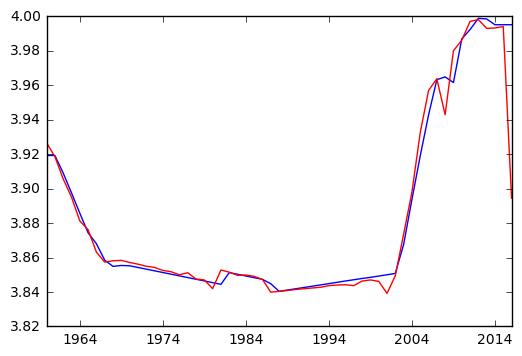

In [112]:
model_Combined = Combined_Model(ts1_log)

In [137]:
aic_metric

,AIC,Modelname
0,-409.621070,"ARIMA(ts, order=(2, 0, 0))"
0,-409.621070,"ARIMA(ts, order=(2, 0, 0))"
0,-408.284330,"ARIMA(ts, order=(2, 0, 0))"
0,-408.284330,"ARIMA(ts, order=(2, 0, 0))"
0,-408.284330,"ARIMA(ts, order=(2, 0, 0))"
0,-408.284330,"ARIMA(ts, order=(2, 0, 0))"
0,-402.269717,"ARIMA(ts, order=(0, 0, 7))"
0,-402.272604,"ARIMA(ts, order=(1, 0, 7))"
0,-407.160849,"ARIMA(ts, order=(2,0, 4))"
0,-408.284330,"ARIMA(ts, order=(3, 0, 0))"


In [131]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(3, 0, 0))


In [122]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    output.tolist()
    output = np.exp(output)
    print(output)
    return output

In [139]:
output_forecast = forecast(model_AR,5)

[ 50.40556309  50.41668918  50.41265576  50.3956927   50.36924042]
